In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [5]:
#code here
data[['MaritalDesc','Sex','Salary']].\
groupby(['MaritalDesc','Sex']).\
agg(min_salary = ('Salary','min'),\
    median_salary = ('Salary','median'),\
    max_salary = ('Salary','max'),
    average_max = ('Salary','mean'))

min_salary  median_salary  max_salary   average_max
MaritalDesc Sex                                                     
Divorced    F         45069        59393.0       68182  57345.500000
            M         45115        63738.5      148999  72520.857143
Married     F         45433        62662.0      250000  69638.986111
            M         46120        63370.5      157000  70089.038462
Separated   F         52984        60627.0       66149  60658.888889
            M         64397        70468.0       74417  69760.666667
Single      F         45395        62068.0      220450  68988.266667
            M         46428        63055.5      178000  71340.048387
Widowed     F         45046        63303.5      107226  69719.750000
            M         52788        61359.0       67176  60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [6]:
#code here
data[['TermReason']].\
groupby(['TermReason']).\
agg(total_termination = ('TermReason','count')).\
sort_values(by='total_termination',ascending=False).\
head(5)

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [7]:
#code here

data[['RecruitmentSource']].\
loc[(data['PerformanceScore'] == 'Exceeds')].\
groupby(['RecruitmentSource']).\
agg(total_recruit = ('RecruitmentSource','count')).\
sort_values(by='total_recruit',ascending=False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [8]:
#code here
data[['Department','ManagerName']].\
groupby(['Department']).\
agg(ManagerName = ('ManagerName','nunique'))

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [9]:
#code here
data[['Sex','Termd']].\
groupby('Sex')['Termd'].value_counts(normalize=True)


Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

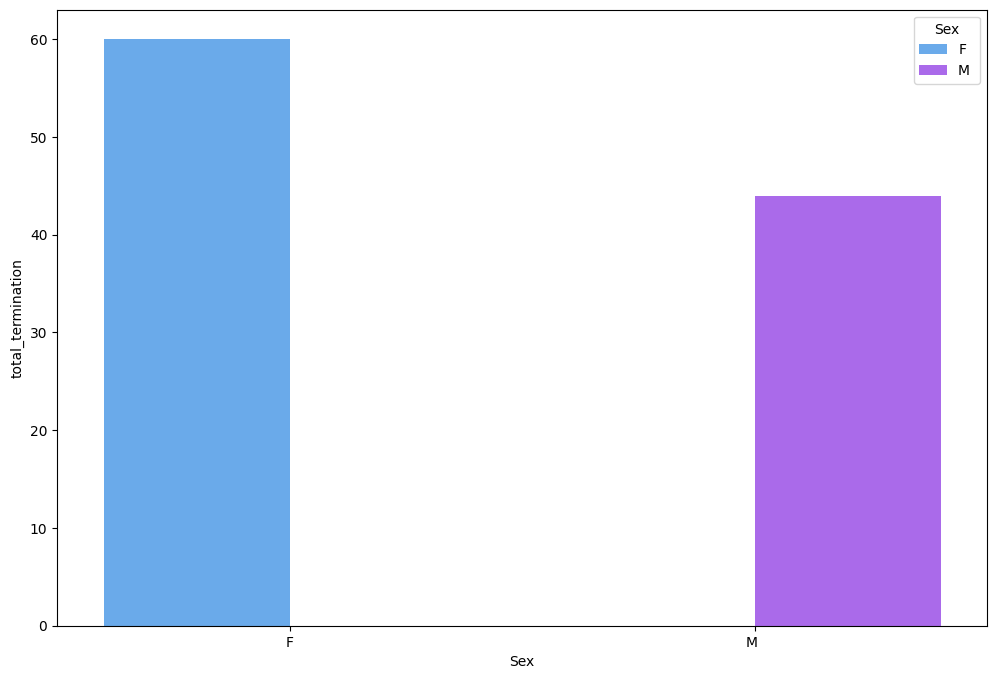

In [10]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

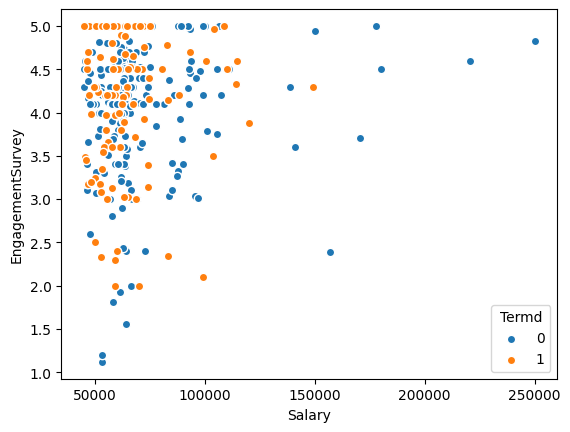

In [11]:
#code here

plt.scatter(x=data['Salary'].loc[(data.Termd==0)], y=data['EngagementSurvey'].loc[(data.Termd==0)], marker ='o',label= '0',edgecolors='white')
plt.scatter(x=data['Salary'].loc[(data.Termd==1)], y=data['EngagementSurvey'].loc[(data.Termd==1)], marker ='o',label= '1',edgecolors='white')
plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')
plt.legend(title="Termd")

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

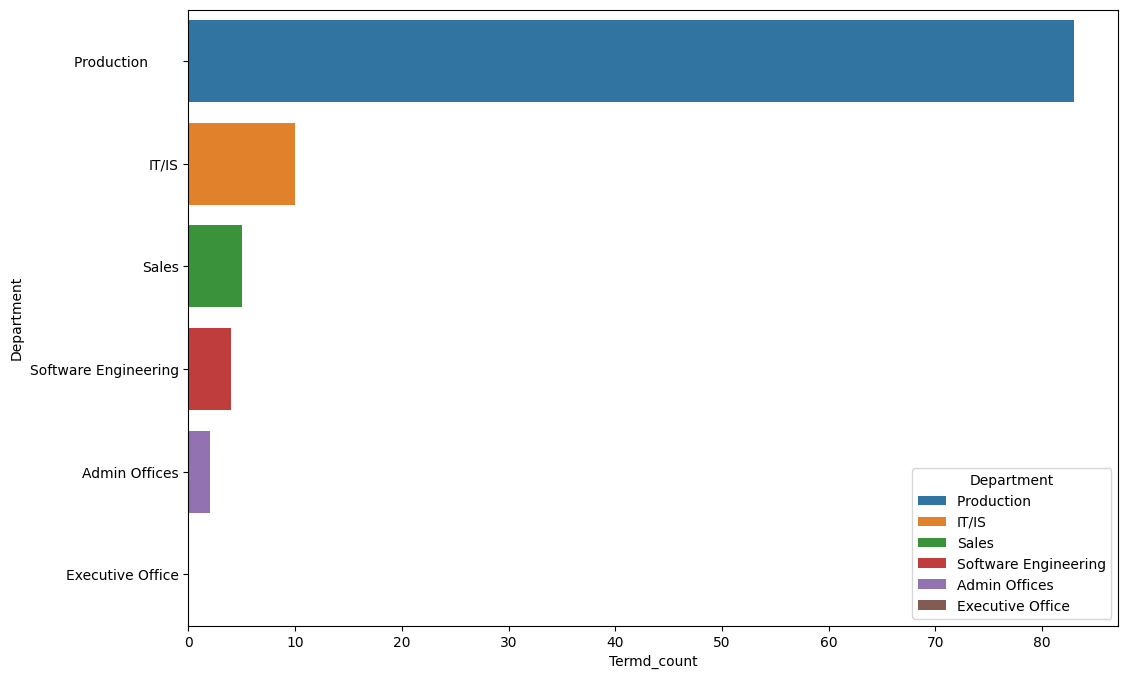

In [12]:
#code here
term = data.groupby(by=['Department'])\
                        .agg(Termd_count=('Termd','sum')).reset_index().\
                        sort_values(by = 'Termd_count',ascending = False)

f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.barplot(x='Termd_count', y='Department', hue="Department",data=term, palette='tab10',dodge=False)

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

([<matplotlib.patches.Wedge at 0x7b02c394c9d0>,
 [Text(6.735557395310444e-17, 1.1, 'Production Technician I'),
  Text(-0.7778174593052025, -0.7778174593052023, 'Production Technician II'),
  Text(0.1655109565392882, -1.0874769529812804, 'Production Manager'),
  Text(0.4514540959314608, -1.003089826120626, 'Area Sales Manager'),
  Text(0.6783907762616203, -0.8659018158447044, 'Software Engineer'),
  Text(0.8450173526450935, -0.7042341043493121, 'Database Administrator'),
  Text(0.9413594146447618, -0.5690715705951859, 'Administrative Assistant'),
  Text(0.9889969395563057, -0.4815444460776816, 'Sr. DBA'),
  Text(1.0162674993104102, -0.42095174289384485, 'Network Engineer'),
  Text(1.039829808894119, -0.3588230323365827, 'Data Analyst'),
  Text(1.0595978919886109, -0.29538501534995354, 'Data Analyst '),
  Text(1.0754996169970839, -0.23086917039554233, 'Principal Data Architect'),
  Text(1.0874769602451484, -0.16551090881259756, 'Enterprise Architect'),
  Text(1.0954862177029399, -0.09954

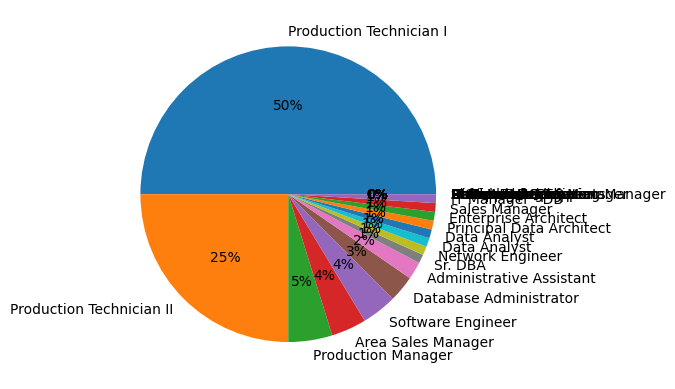

In [13]:
#code here
term = data.groupby(by=['Position'])\
                        .agg(total_termination=('Termd','sum')).reset_index().\
                        sort_values(by = 'total_termination',ascending = False)
plt.pie(term['total_termination'],
        autopct="%1.0f%%",
        textprops=dict(color="black", size=10),
        labels=term['Position'])

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

<Axes: xlabel='Salary', ylabel='MaritalDesc'>

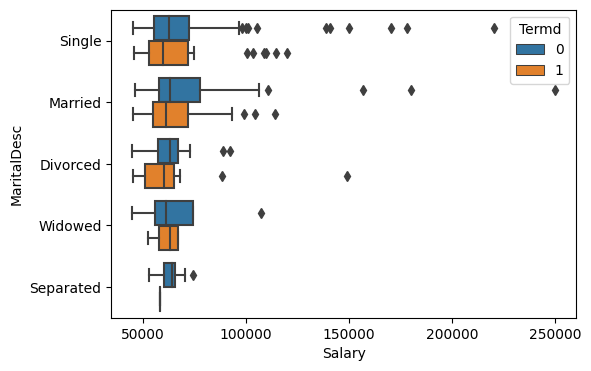

In [14]:
#code here

plt.figure(figsize=(6,4))
sns.boxplot(y='MaritalDesc',x='Salary',hue='Termd',data=data)

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


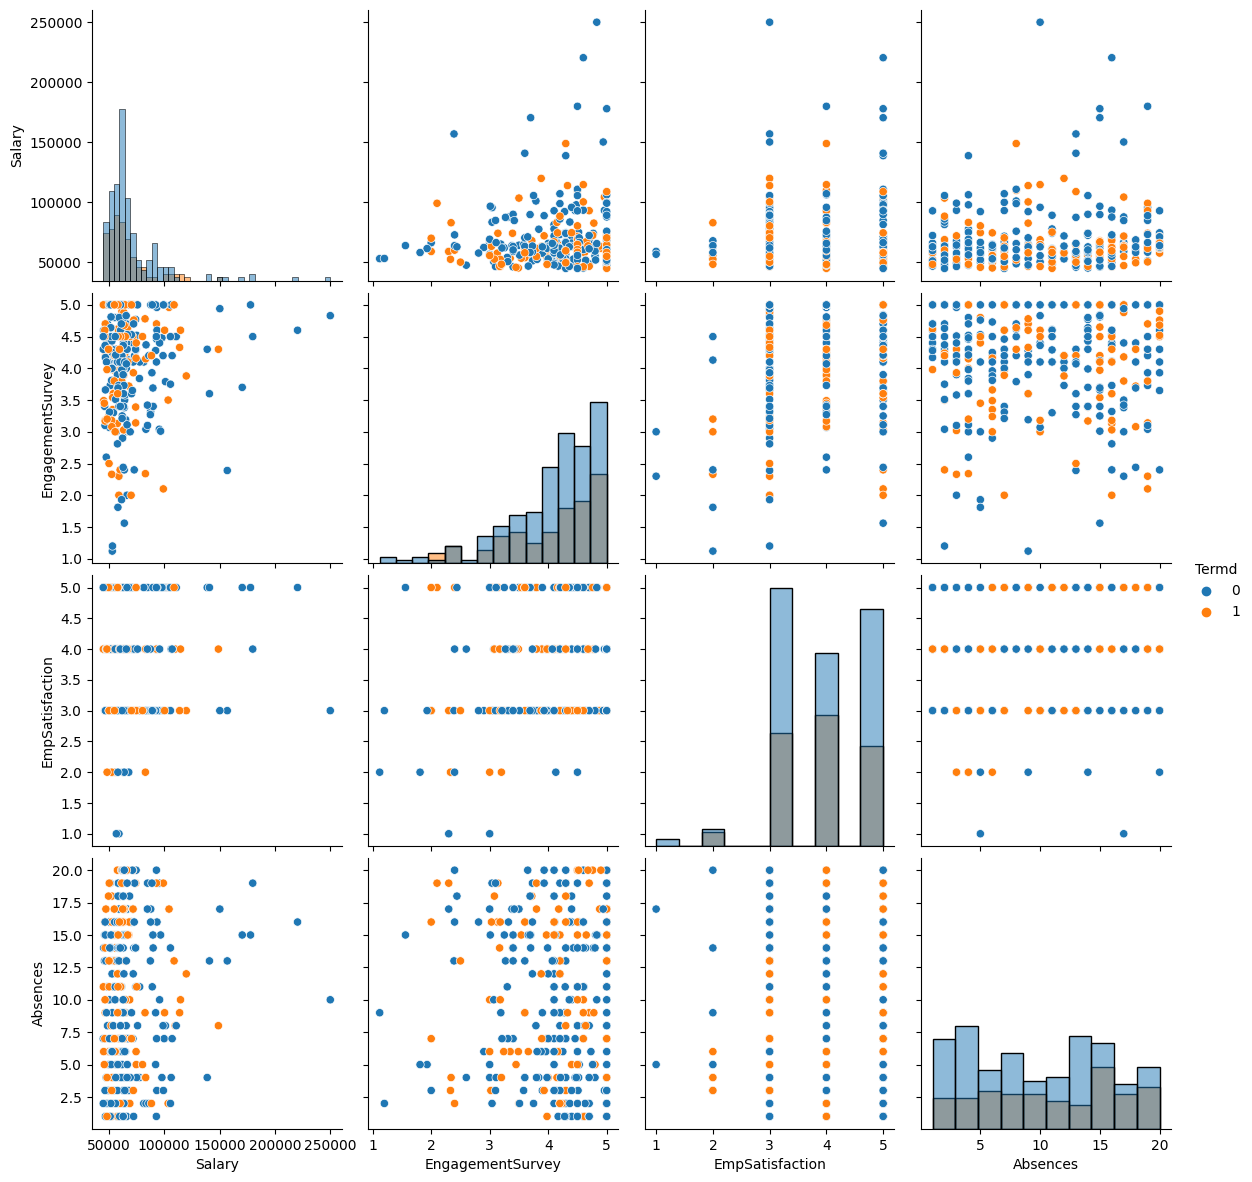

In [15]:
#code here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Insight (Answering the Question)

11.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
12.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

In [28]:
#code here
grouped = data[['ManagerName','PerformanceScore']].\
groupby(['ManagerName', 'PerformanceScore']).size().unstack(fill_value=0)

grouped

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,10,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


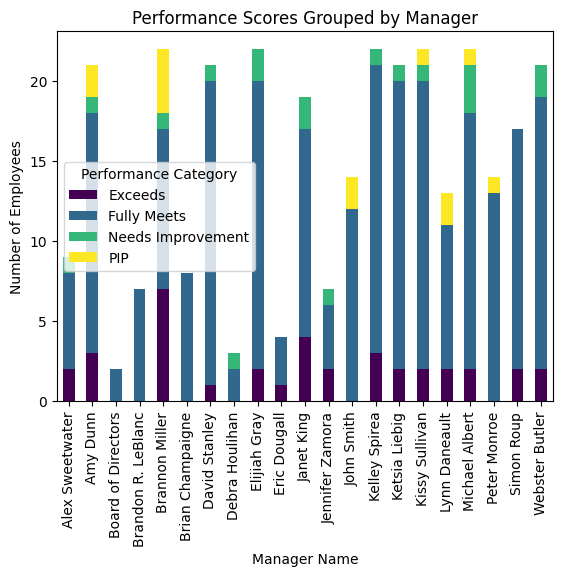

In [30]:
grouped.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Performance Scores Grouped by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Category')

11.

No, the performance score of an employee isn't influenced by the person who they work for (the manager). Each manager has varying numbers of employees in different performance score categories. For instance, Branon Miller has the most employees with 'exceed' performance, but also the most with 'PIP' performance.  Thus, it can't be determined whether a manager has a direct impact to their employees' performance.

In [32]:
#12
recsource = data[['RecruitmentSource','Termd']].\
loc[data.Termd == 0].\
groupby(['RecruitmentSource']).\
agg(termd_count0=('Termd','count'))

recsource

,termd_count0
RecruitmentSource,
CareerBuilder,12
Diversity Job Fair,13
Employee Referral,26
Google Search,19
Indeed,66
LinkedIn,58
Other,1
Website,12


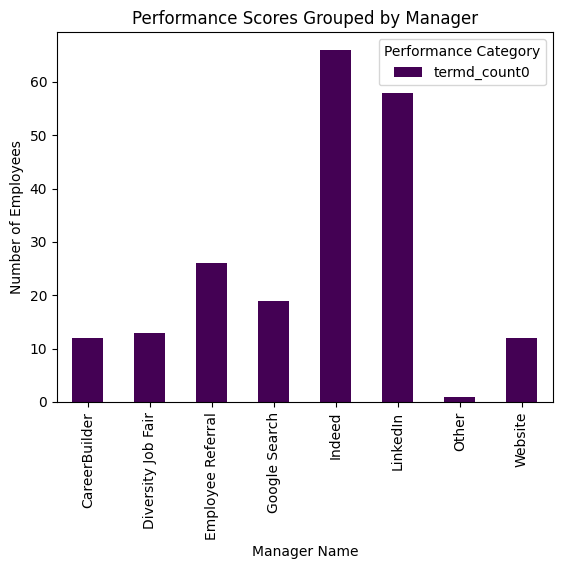

In [33]:
recsource.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Performance Scores Grouped by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Number of Employees')
plt.legend(title='Performance Category')

In [35]:

recsource2 = data[['RecruitmentSource','Termd']].\
groupby(['RecruitmentSource']).\
value_counts(normalize=True)

recsource2

RecruitmentSource        Termd
CareerBuilder            0        0.521739
                         1        0.478261
Diversity Job Fair       1        0.551724
                         0        0.448276
Employee Referral        0        0.838710
                         1        0.161290
Google Search            1        0.612245
                         0        0.387755
Indeed                   0        0.758621
                         1        0.241379
LinkedIn                 0        0.763158
                         1        0.236842
On-line Web application  1        1.000000
Other                    0        0.500000
                         1        0.500000
Website                  0        0.923077
                         1        0.076923
dtype: float64

12. The best recruiting sources if we want to ensure a low ratio of termination are the ones with high ratio of not getting terminated (Termd = 0).
Based on the table above, the BEST recruiting source is Website with ratio of Termd=0 is 0.923, SECOND best is Employee Referral with 0.838 ratio, THIRD best is LinkedIn with 0.763 ratio.

# Create Machine Learning Model to Predict Termd and Question

In [39]:
#13. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)


In [40]:
#code here
from datetime import datetime, date

dob = data['DOB']
df = pd.DataFrame(data = dob)

def dob_date(born):
  born = datetime.strptime(born, "%m/%d/%y").date()
  return born.strftime("%Y-%m-%d")

def age(born):
  born = datetime.strptime(born, "%m/%d/%y").date()
  today=date.today()
  return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))
df['DOB_date'] = df['DOB'].apply(dob_date)
df['Age'] = df['DOB'].apply(age)
display(df)
data['DOB_date'] = df['DOB_date']
data['Age'] = df['Age']

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,40
1,05/05/75,1975-05-05,48
2,09/19/88,1988-09-19,35
3,09/27/88,1988-09-27,35
4,09/08/89,1989-09-08,34
...,...,...,...
306,05/11/85,1985-05-11,38
307,05/04/82,1982-05-04,41
308,08/30/79,1979-08-30,44
309,02/24/79,1979-02-24,44


In [41]:
#14. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler


In [42]:
#code here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y = np.array(data['Salary']).reshape(-1,1)
scaler.fit(y)
data['Salary_minmax'] = scaler.transform(y)
data[['Salary','Salary_minmax']]

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [43]:
#15. Ubahlah semua tipe data object menjadi category
# 5 point

In [44]:
#code here
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [45]:
#code here
data[['Position','State','DOB','Sex','MaritalDesc','CitizenDesc',\
             'HispanicLatino','RaceDesc','DateofHire','DateofTermination','TermReason',\
             'EmploymentStatus','Department','ManagerName','RecruitmentSource',\
             'PerformanceScore','LastPerformanceReview_Date']] \
             = data[['Position','State','DOB','Sex','MaritalDesc','CitizenDesc',\
             'HispanicLatino','RaceDesc','DateofHire','DateofTermination','TermReason',\
             'EmploymentStatus','Department','ManagerName','RecruitmentSource',\
             'PerformanceScore','LastPerformanceReview_Date']].astype('category')
data.dtypes

Employee_Name                   object
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [46]:
#16. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#17. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder


In [47]:
#code here
from sklearn.preprocessing import LabelEncoder
labelenc= LabelEncoder()
data['RecruitmentSource'] = labelenc.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = labelenc.fit_transform(data['PerformanceScore'])
data.dtypes

Employee_Name                   object
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [48]:
#18. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)


#Independent Variable (feature)


In [49]:
#code here
data_x = data[['MarriedID','MaritalStatusID','GenderID','DeptID','PerfScoreID',\
               'PositionID','Age','RecruitmentSource','PerformanceScore','Salary_minmax',\
               'Absences','SpecialProjectsCount','EmpSatisfaction','EngagementSurvey']].copy()
data_y = data.Termd
data_x.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,40,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,48,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,35,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,35,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,34,3,1,0.028197,2,0,4,5.00


In [50]:
#19. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=28)

In [51]:
#20. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

# Experiment on Several Classification Algorithms

In [52]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(tol=0.1, C=1, max_iter=1000,penalty=None)

train_model = model.fit(X_train, y_train)

y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print("Accuracy  %.2f%%" % (accuracy * 100.0))
print("Precision : %.2f%%" % (precision* 100.0))
print("Recall : %.2f%%" % (recall * 100.0))

Accuracy  52.38%
Precision : 50.00%
Recall : 16.67%


In [53]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
train_model = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate the performance of the Random Forest model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))


Accuracy: 57.14%
Precision: 66.67%
Recall: 20.00%


In [54]:
#Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Support Vector Machine classifier
model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Train the model on the training data
train_model = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))


Accuracy: 52.38%
Precision: 0.00%
Recall: 0.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
#Gradient Boosting classifier (XGBoost)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the XGBoost classifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
train_model = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate the performance of the XGBoost model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))


Accuracy: 50.79%
Precision: 46.15%
Recall: 20.00%


In [56]:
#k-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
train_model = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))


Accuracy: 58.73%
Precision: 64.29%
Recall: 30.00%


In [57]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the model on the training data
train_model = model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate the performance of the Naive Bayes model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))


Accuracy: 58.73%
Precision: 59.09%
Recall: 43.33%


**CONCLUSION ON ML ALGORITHM COMPARISON:**
k-Nearest Neighbor is the most optimal algorithm to apply classification on the data, with higher precision and lower recall than Naive Bayes.

Higher precision means the precision has lower chance to mispredict that an employee is going to quit, when the truth is he/she is not going to.

Lower recall means the recall has higher chance to mispredict that an employee is not going to quit, when the truth is he/she is going to. This might result in missing some employees who are actually thinking of quitting quietly. However, this trade-off is intentional to avoid unnecessary disruptions or sudden decisions based on suspicions.

This approach can be considered more ethical, especially when making decisions that impact employees' careers and the overall work environment. Being overly cautious in predicting employee turnover can lead to unintended consequences, such as unnecessary stress for employees who have no intention of leaving.


Showing confusion matrix of KNN algorithm result below

Accuracy: 58.73%
Precision: 64.29%
Recall: 30.00%


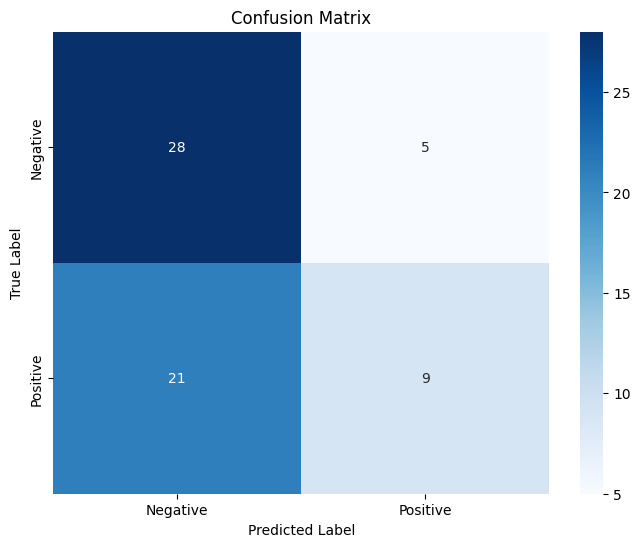

In [58]:
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

model = KNeighborsClassifier(n_neighbors=5)

train_model = model.fit(X_train, y_train)

y_pred = train_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the evaluation metrics
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
